In [5]:
import os
import re
import networkx as nx

In [48]:
class Person:
    def __init__(self, id, name, partner, father, mother):
        self.id = id
        self.name = name
        self.partner = partner
        self.father = father
        self.mother = mother
    def __str__(self):
        if self.mother != None:
            return self.id + ', ' + self.name + ', ' + " ".join(str(x) for x in self.partner) + ', ' + self.father + ', ' + self.mother
        else:
            return self.id + ', ' + self.name + ', ' + " ".join(str(x) for x in self.partner)

In [62]:
for filename in os.listdir():
    if '.csv' not in filename:
        continue
    file = open(filename,'r')
    
    #Header
    file.readline()
    
    #Array to store family members
    members = []
    
    for line in file:
        line = line.rstrip()
        if line:
            
            #Row (family member)
            parameters = re.split(r';', line)
            
            #They can have more than one partner (married more than once)
            partners = [] 
            if not parameters[2] == '':
                for p in parameters[2].split(','):
                    partners.append(p)
            
            #We don't have father nor mother
            if parameters[3] == '' and parameters[4] == '':
                members.append(Person(parameters[0],parameters[1],partners,None,None))
            else:
                members.append(Person(parameters[0],parameters[1],partners,parameters[3],parameters[4]))                           

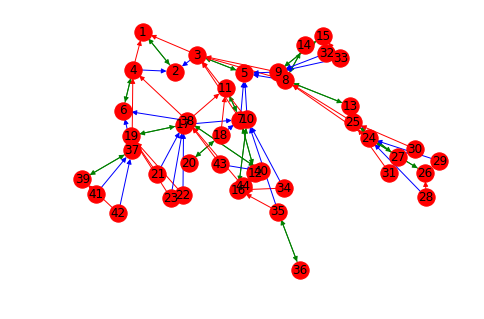

In [68]:
G = nx.DiGraph()

#We add all the members to the network
for mem in members:
    G.add_node(mem.id)
    
#We add all partner associations
for mem in members:
    partners = mem.partner
    for p in partners:
        G.add_edge(mem.id,p,color='g')

#We add all the siblings associations
for mem in members:
    if mem.mother != None:
        G.add_edge(mem.id,mem.mother,color='r')
        G.add_edge(mem.id,mem.father,color='b')

#We display the network
#nx.draw_kamada_kawai(G, with_labels = True)

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]

nx.draw(G, edge_color=colors, with_labels = True, arrows = True)